<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/mmtps_lr23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

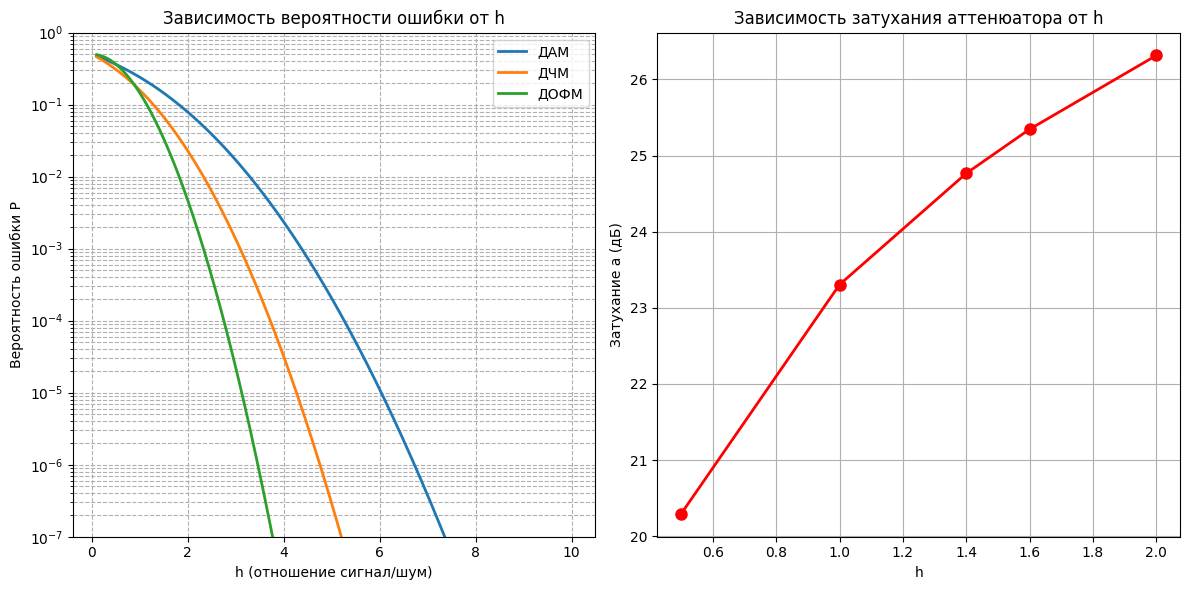

Таблица затуханий:
h	 a (дБ)
0.5	 20.295
1.0	 23.305
1.4	 24.766
1.6	 25.346
2.0	 26.315

Вероятности ошибки для заданных h:
h	 P_ДАМ		 P_ДЧМ		 P_ДОФМ
0.5	 3.62e-01	 3.09e-01	 3.65e-01
1.0	 2.40e-01	 1.59e-01	 1.45e-01
1.4	 1.61e-01	 8.08e-02	 4.66e-02
1.6	 1.29e-01	 5.48e-02	 2.34e-02
2.0	 7.86e-02	 2.28e-02	 4.67e-03


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Исходные данные
E = 6.25e-6
delta_f = 11960  # Гц
U_out = 4  # В

# Значения h для расчётов
h_values = np.array([0.5, 1.0, 1.4, 1.6, 2.0])

# 1. Расчёт затухания a(h)
def attenuation(h, U_out, E, delta_f):
    return 10 * np.log10(U_out**2 * h / (E * delta_f))

a_values = attenuation(h_values, U_out, E, delta_f)

# 2. Расчёт вероятности ошибки
def P_dam(h):
    return 1 - norm.cdf(h / np.sqrt(2))

def P_dfm(h):
    return 1 - norm.cdf(h)

def P_odphm(h):
    P_dphm = 1 - norm.cdf(np.sqrt(2) * h)
    return 2 * P_dphm * (1 - P_dphm)

# Для графиков P(h) в диапазоне 0...10
h_range = np.linspace(0.1, 10, 500)
P_dam_range = P_dam(h_range)
P_dfm_range = P_dfm(h_range)
P_odphm_range = P_odphm(h_range)

# 3. Построение графиков
plt.figure(figsize=(12, 6))

# График P(h)
plt.subplot(1, 2, 1)
plt.semilogy(h_range, P_dam_range, label='ДАМ', linewidth=2)
plt.semilogy(h_range, P_dfm_range, label='ДЧМ', linewidth=2)
plt.semilogy(h_range, P_odphm_range, label='ДОФМ', linewidth=2)
plt.xlabel('h (отношение сигнал/шум)')
plt.ylabel('Вероятность ошибки P')
plt.title('Зависимость вероятности ошибки от h')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.ylim(1e-7, 1)

# График a(h)
plt.subplot(1, 2, 2)
plt.plot(h_values, a_values, 'o-', color='red', linewidth=2, markersize=8)
plt.xlabel('h')
plt.ylabel('Затухание a (дБ)')
plt.title('Зависимость затухания аттенюатора от h')
plt.grid(True)
plt.tight_layout()
plt.show()

# Вывод таблицы затуханий
print("Таблица затуханий:")
print("h\t a (дБ)")
for h, a in zip(h_values, a_values):
    print(f"{h}\t {a:.3f}")

# Вывод вероятностей ошибки для заданных h
print("\nВероятности ошибки для заданных h:")
print("h\t P_ДАМ\t\t P_ДЧМ\t\t P_ДОФМ")
for h in h_values:
    print(f"{h}\t {P_dam(h):.2e}\t {P_dfm(h):.2e}\t {P_odphm(h):.2e}")